In [1]:
import cv2
print(cv2.__version__)

3.4.2


In [2]:
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Split MP4 Video into Individual Frames

In [3]:
try:
    if not os.path.exists('frames'):
        os.makedirs('frames')
except OSError:
    print('Error: Creating directory of frames')

In [4]:
vidcap = cv2.VideoCapture('Splitting_Video_into_Images.mp4')
frame_no = 0
success, image = vidcap.read()
while success:
    name = './frames/frame' + str(frame_no) + '.jpg'
    cv2.imwrite(name, image)
    success, image = vidcap.read()
    frame_no += 1
vidcap.release() #closes video file or capturing device

### Split MP4 Video into Individual Frames (1 Frame per Second)

In [34]:
try:
    if not os.path.exists('frames_1ps'):
        os.makedirs('frames_1ps')
except OSError:
    print('Error: Creating directory of frames')

In [35]:
vidcap = cv2.VideoCapture('Splitting_Video_into_Images.mp4')
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
frame_no = 0
success, image = vidcap.read()
while success:
    if frame_no % fps == 0:
        name = './frames_1ps/frame' + str(frame_no // fps) + '.jpg'
        cv2.imwrite(name, image)
    success, image = vidcap.read()
    frame_no += 1
vidcap.release() #closes video file or capturing device

### Split MP4 Video into Individual Frames (1 Frame per Second & Limited Time Frame)

In [36]:
try:
    if not os.path.exists('frames_lmtd'):
        os.makedirs('frames_lmtd')
except OSError:
    print('Error: Creating directory of frames')

In [40]:
vidcap = cv2.VideoCapture('Splitting_Video_into_Images.mp4')
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
frame_no = 0
stop_time_ms = 42000
success, image = vidcap.read()
while success and vidcap.get(cv2.CAP_PROP_POS_MSEC) <= stop_time_ms:
    if frame_no % fps == 0:
        name = './frames_lmtd/frame' + str(frame_no // fps) + '.jpg'
        cv2.imwrite(name, image)
    success, image = vidcap.read()
    frame_no += 1
vidcap.release() #closes video file or capturing device

### Crop and OCR Individual Frames

In [81]:
from PIL import Image, ImageOps
import pytesseract

In [45]:
print(pytesseract.get_tesseract_version())

4.0.0


In [82]:
def crop_box(input_image):
    crop_width = 290
    crop_height = 220
    width, height = input_image.size
    #box coordinates: x, y of upper left corner, then x, y of lower right corner
    #0, 0 coordinates are upper left corner
    box = 0, height - crop_height, crop_width, height
    return input_image.crop(box)

In [90]:
#CROP AND SAVE BOTTOM-LEFT BOX OF EACH IMAGE
try:
    if not os.path.exists('loc_box'):
        os.makedirs('loc_box')
except OSError:
    print('Error: Creating directory of location boxes')
    
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        im = Image.open(indir + filename)
        region = crop_box(im)
        dir_path = './loc_box'
        region.save(f'{dir_path}/{filename}','JPEG')

In [54]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = Image.open(indir + filename)
        region = crop_box(im)
        text = pytesseract.image_to_string(region, lang='eng', config='--oem 1 --psm 1') #oem 1 means Neural Nets LSTM engine
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PBZ le) arson
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

PR le) ar
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COL

In [86]:
#SAME BUT WITH BORDER ADDED TO IMAGE
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = Image.open(indir + filename)
        region = crop_box(im)
        new_im = ImageOps.expand(region, border=10, fill=(255,255,255))
        #plt.imshow(new_im)
        #plt.show()
        text = pytesseract.image_to_string(new_im, lang='eng', config='--oem 1 --psm 1') #oem 1 means Neural Nets LSTM engine
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M

HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PBZ le) arson

HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M

HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M

HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M

HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

PR le) ar

HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M

HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT

### Run OCR on Italics Separately

In [55]:
def crop_box_ital(input_image):
    crop_width = 290
    crop_height = 141
    width, height = input_image.size
    #box coordinates: x, y of upper left corner, then x, y of lower right corner
    #0, 0 coordinates are upper left corner
    box = 0, height - crop_height, crop_width, height
    return input_image.crop(box)

In [56]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = Image.open(indir + filename)
        region = crop_box_ital(im)
        text = pytesseract.image_to_string(region, lang='eng', config='--oem 1 --psm 1') #oem 1 means Neural Nets LSTM engine
        print(text)

###################frame46.jpg###################
ELEVATION: 26 M
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
PBZ le) arson
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
ELEVATION: 25 M
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
PR le) ar
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
ELEVATION: 25 M
HEADING: 131° (T)
PISA]
TIME: 5:54:11 AM
###################frame19.jpg###################

###################frame25.jpg###################
ELEVATION: 

In [78]:
def crop_box_1_line(input_image):
    crop_width = 290    
    top_corner_height = 78
    bottom_corner_height = 36
    width, height = input_image.size
    #box coordinates: x, y of upper left corner, then x, y of lower right corner
    #0, 0 coordinates are upper left corner
    box = 0, height - top_corner_height, crop_width, height - bottom_corner_height
    return input_image.crop(box)

In [80]:
#RUN OCR ON JUST ONE INCORRECT LINE
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = Image.open(indir + filename)
        region = crop_box_1_line(im)
        #plt.imshow(region)
        #plt.show()
        text = pytesseract.image_to_string(region, lang='eng', config='--oem 1') #oem 1 means Neural Nets LSTM engine
        print(text)

###################frame46.jpg###################
PIE KEL]
###################frame47.jpg###################
DATE: 5/3/18
###################frame45.jpg###################
DATE: 5/3/18
###################frame44.jpg###################
DATE: 5/3/18
###################frame40.jpg###################
PoE EL]
###################frame41.jpg###################
DATE: 5/3/18
###################frame43.jpg###################
DATE: 5/3/18
###################frame42.jpg###################
PISA]
###################frame19.jpg###################

###################frame25.jpg###################
Pe ISEK EL]
###################frame31.jpg###################
DATE: 5/3/18
###################frame30.jpg###################
DATE: 5/3/18
###################frame24.jpg###################
PIER EL]
###################frame18.jpg###################

###################frame32.jpg###################
PoE KEL]
###################frame26.jpg###################
PIER EL]
###################frame27.jpg###############

### Convert all non-white pixels to black

In [3]:
img = cv2.imread('./frames_lmtd/frame32.jpg')
img[np.where((img != [255,255,255]).all(axis=2))] = [0,0,0]

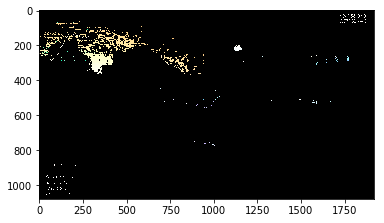

In [5]:
plt.imshow(img)
plt.show()

### Apply Pre-processing on Images to Improve OCR Output

In [74]:
#TRY SAVING ARRAY TO PIL IMAGE BEFORE PASSING TO TESSERACT
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(Image.fromarray(region, mode='L'), lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

PR le) and
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

PR le) ar
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COLUMBIA

EL

In [27]:
#CONVERT IMAGE TO GRAYSCALE
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(region, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

PR le) and
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

PR le) ar
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COLUMBIA

EL

### Scale (Enlarge) Images

In [71]:
#SCALE (ZOOM IN)
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        new_im = cv2.resize(region, (2*crop_height,2*crop_width), interpolation = cv2.INTER_CUBIC)
        text = pytesseract.image_to_string(Image.fromarray(new_im), lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

Pn VO PAL
HEADING: 127° (T)
a RET
Ue AU
###################frame47.jpg###################
DISTRICT OF COLUMBIA

Pn VO PAL
HEADING: 127° (T)
a RET

1 ee OU
###################frame45.jpg###################
DISTRICT OF COLUMBIA

Pan VO PAL
HEADING: 127° (T)
Wa RET
SU
###################frame44.jpg###################
DISTRICT OF COLUMBIA

OSL
aC
USER)
ee
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ale re
= LN CR
Ue RIE

UT eee ASU
###################frame41.jpg###################
DISTRICT OF COLUMBIA

nO
HEADING: 131° (T)
eek AL
eee AU
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ROS
= RT
USER)
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COLUMBIA

AOS
= CRE
We RAL
UU
###################frame19.jpg###################

###################frame25.jpg###################
DISTRICT OF COLUMBIA

Pn VO Pa
HEADING: 125° (T)
a RET
1 SRL
###

### Apply dilation and erosion to remove the noise

In [34]:
indir = './frames_lmtd/'
kernel = np.ones((1,1), np.uint8)
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        new_im = cv2.dilate(region, kernel, iterations=1)
        new_im = cv2.erode(new_im, kernel, iterations=1)
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PBZ le) arson
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF 

### Apply Filters and Binarization

In [40]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        new_im = cv2.threshold(cv2.GaussianBlur(region, (5,5), 0), 250, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

p20 ie re
ee Cer emer
pei oe cal)
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

cE e re
ee) Cer am ee]
pee cal
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

p57 ie re
a wel cer iam ee]
peat al]

Ri See ET
###################frame44.jpg###################
OISTRICT OF COLUMBIA

po E Sie re
HEADING: 130° (T)
DATE: 8/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

fatale en
HEADING: 130° (1)
ae aL)
by eer]
###################frame41.jpg###################
DISTRICT OF COLUMBIA

poe 2
ee CK ae)
pee al

Bi See wT
###################frame43.jpg###################
DISTRICT OF COLUMBIA

poE SE e re
HEADING: 131° (1)
peor)

Pi See ET
###################frame42.jpg###################
DISTRICT OF COLUMBIA

poe 2
HEADING: 131° (1)
ev ae al
Ph See SE
###################frame19.jpg###################


### Apply Binarization Only

###################frame46.jpg###################


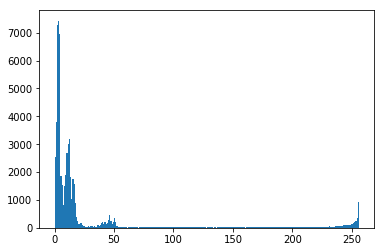

###################frame47.jpg###################


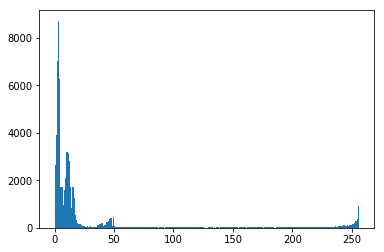

###################frame45.jpg###################


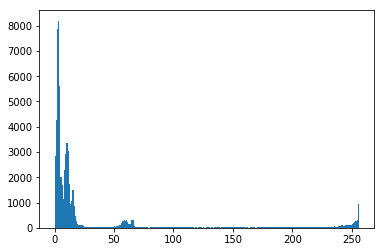

###################frame44.jpg###################


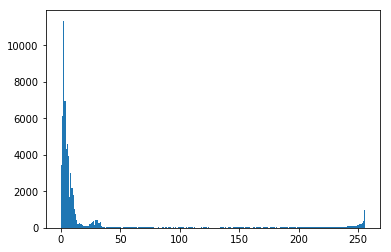

###################frame40.jpg###################


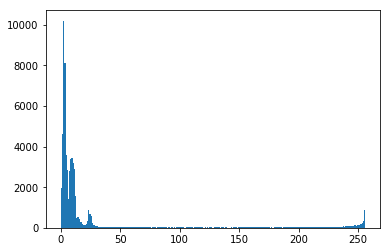

###################frame41.jpg###################


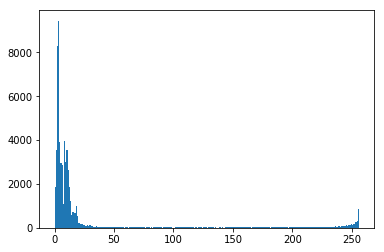

###################frame43.jpg###################


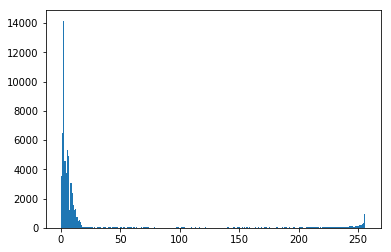

###################frame42.jpg###################


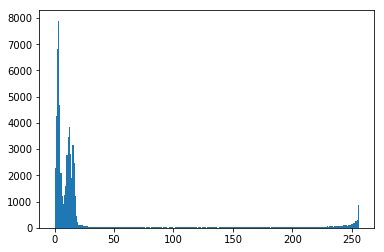

###################frame19.jpg###################


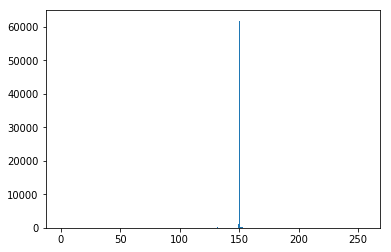

###################frame25.jpg###################


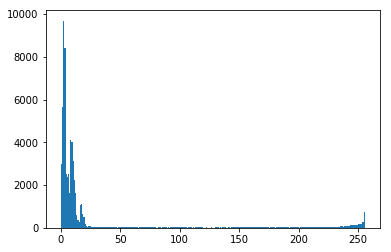

###################frame31.jpg###################


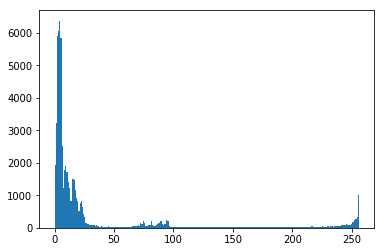

###################frame30.jpg###################


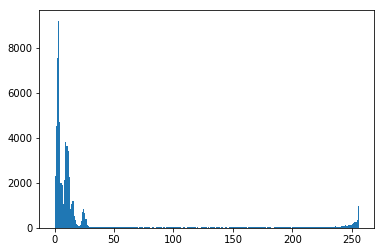

###################frame24.jpg###################


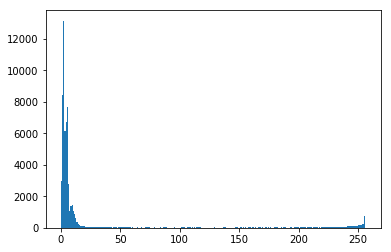

###################frame18.jpg###################


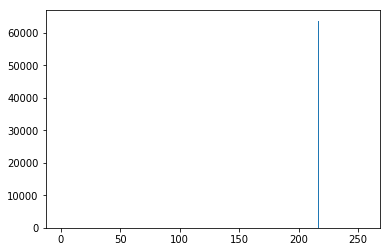

###################frame32.jpg###################


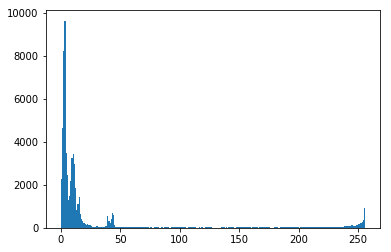

###################frame26.jpg###################


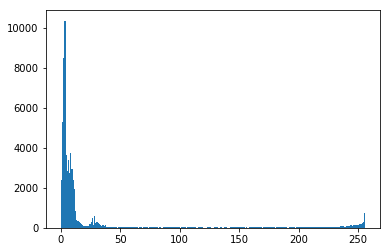

###################frame27.jpg###################


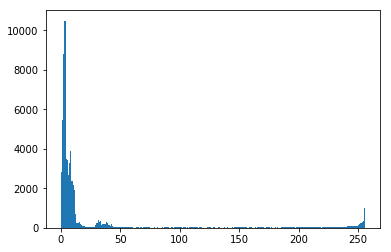

###################frame33.jpg###################


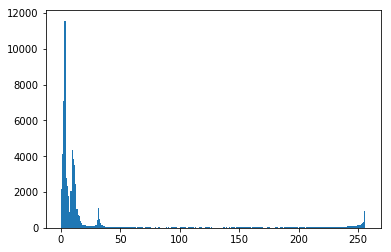

###################frame37.jpg###################


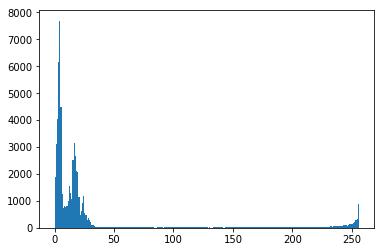

###################frame23.jpg###################


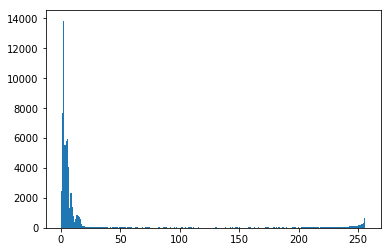

###################frame22.jpg###################


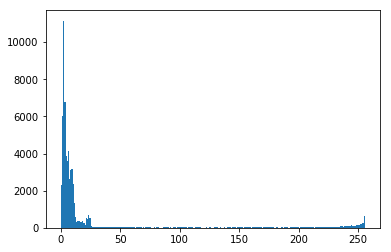

###################frame36.jpg###################


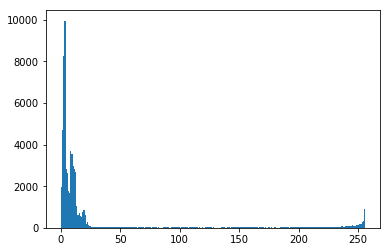

###################frame20.jpg###################


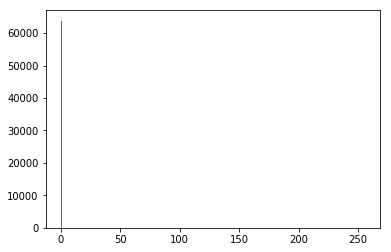

###################frame34.jpg###################


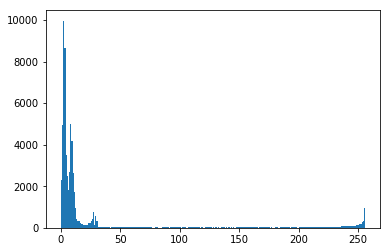

###################frame9.jpg###################


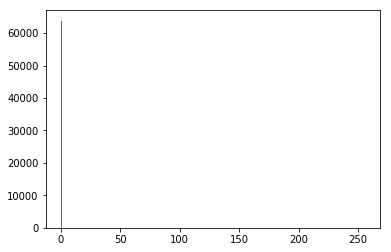

###################frame8.jpg###################


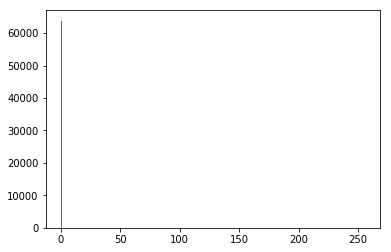

###################frame35.jpg###################


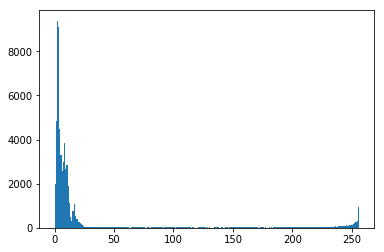

###################frame21.jpg###################


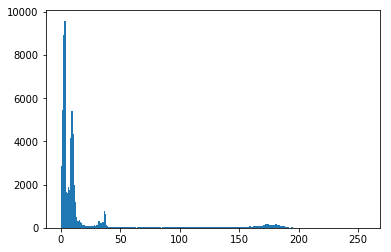

###################frame38.jpg###################


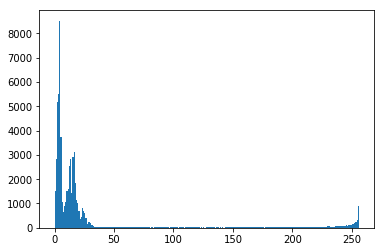

###################frame5.jpg###################


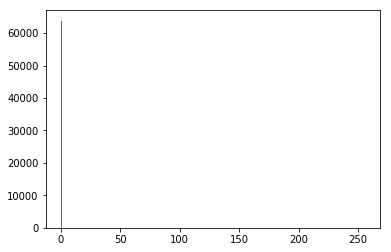

###################frame10.jpg###################


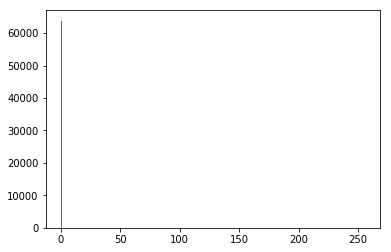

###################frame11.jpg###################


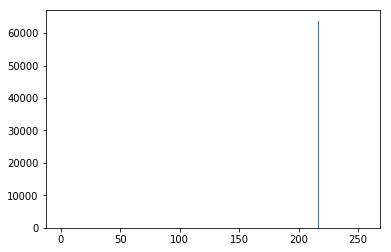

###################frame4.jpg###################


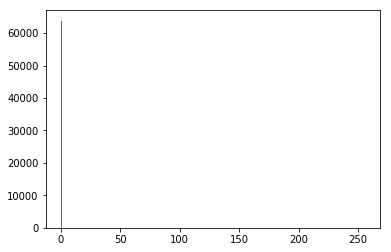

###################frame39.jpg###################


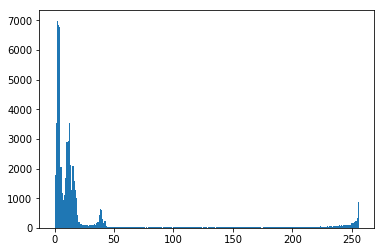

###################frame6.jpg###################


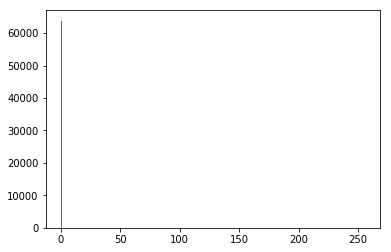

###################frame13.jpg###################


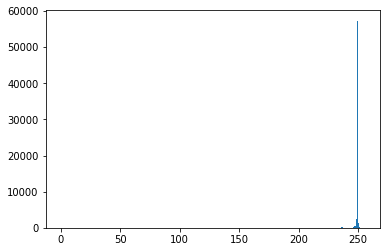

###################frame12.jpg###################


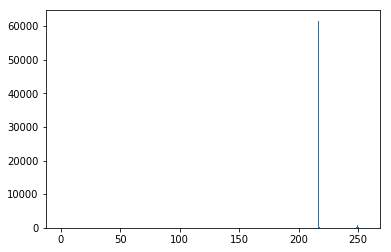

###################frame7.jpg###################


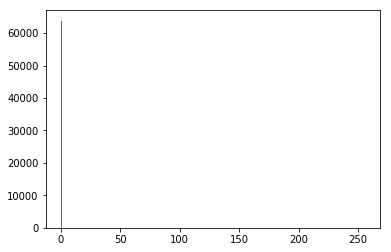

###################frame3.jpg###################


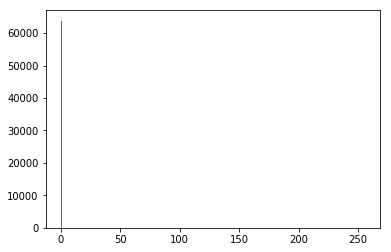

###################frame16.jpg###################


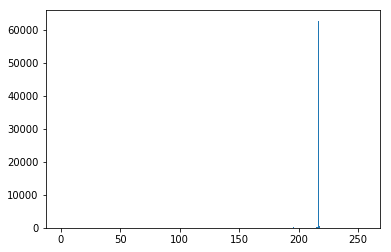

###################frame17.jpg###################


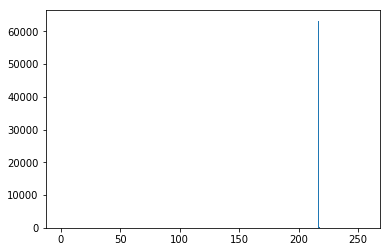

###################frame2.jpg###################


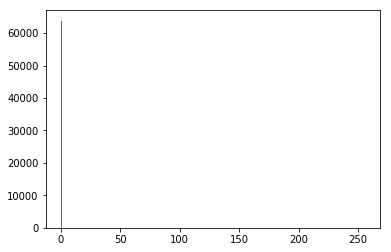

###################frame0.jpg###################


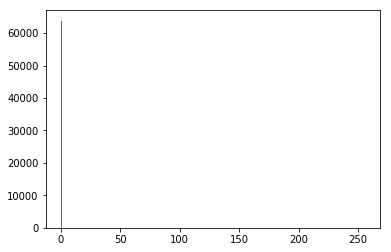

###################frame15.jpg###################


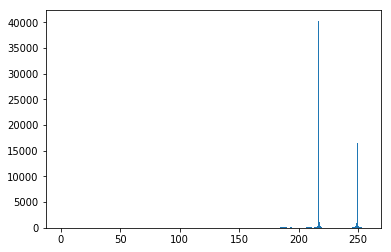

###################frame29.jpg###################


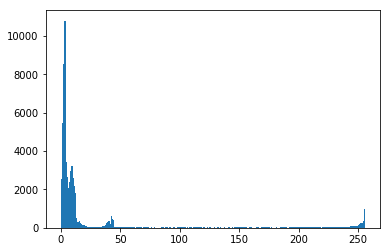

###################frame28.jpg###################


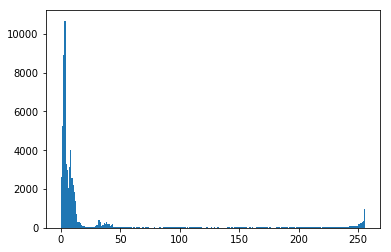

###################frame14.jpg###################


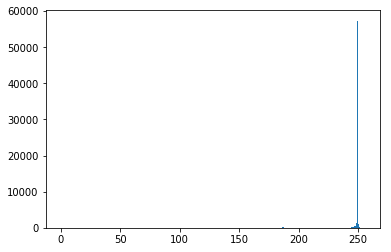

###################frame1.jpg###################


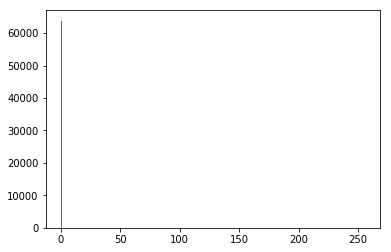

###################frame49.jpg###################


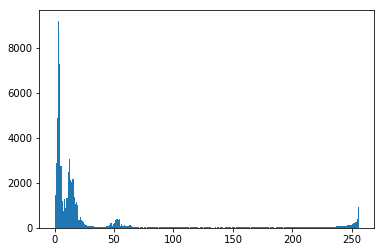

###################frame48.jpg###################


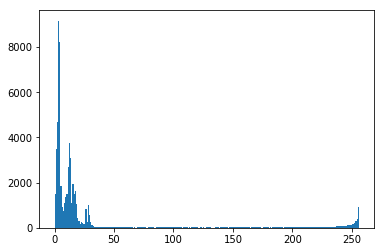

In [61]:
#PLOT HISTOGRAM OF GRAYSCALE PIXELS
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        
        plt.hist(region.ravel(),256,[0,256])
        plt.show()

In [68]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        new_im = cv2.threshold(region,120,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        #plt.imshow(new_im)
        #plt.show()
        #new_im = cv2.threshold(cv2.GaussianBlur(region, (5,5), 0), 250, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

pe 73 0) aoe I
HEADING: 127° (1)
ei Se EL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

pam 0) arse
HEADING: 127° (1)
ei Se EL]
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

pe 0) aon
HEADING: 127° (1)
fee EL]
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

pm Ol larson I
HEADING: 130° (1)
fe Nie EL]
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 130° (1)
for Ti Se KEL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

poe A735 ol are
HEADING: 131° (1)
for Ti Se KEL]
TIME: 5:54:07 AM
###################frame43.jpg###################
BUTI eg me eee) BUl ey

PRY Ol ark
HEADING: 131° (1)
ete aL]
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COLUMBIA

ELEVA

### Adaptive threshold

In [57]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        new_im = cv2.adaptiveThreshold(region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################

###################frame47.jpg###################
DISTRICT OF COLUMBIA

    

PTV Oe De
HEADING: 127° (7)
ae E
ae
###################frame45.jpg###################
. TIME: 5:54:23 AM
###################frame44.jpg###################

###################frame40.jpg###################
aE EL]
ee RSC

 

J
###################frame41.jpg###################
Cee de
PVs oom ELBA ES)
###################frame43.jpg###################
DISTRICT OF Protest
a ~

are
oy ORE TE]
ye ED
Se
###################frame42.jpg###################
eK EL]
eee Se
###################frame19.jpg###################

###################frame25.jpg###################
Cars OF COLUMBIA

   

. Peo 22M
HEADING: 125° (1)
eK EL
PRR Oe
###################frame31.jpg###################
PEAR
Laer e
oniaaate
###################frame30.jpg###################

###################frame24.jpg###################
etal)
Perl
Pray Cerri)

     
   
   

bare]
###################frame18